In this example, we show how to obtain a magnetic skyrmion using atomistic module in MicroMagnetic.
We import MicroMagnetic and use double float precision in the simulation.

In [1]:
using MicroMagnetic
using CairoMakie

We create a CubicMesh

In [2]:
mesh =  CubicMesh(nx=120, ny=120, nz=1, pbc="xy");

To start the simulation, we need to give an initial state.
We define a function in which we set the spins around site (60,60) to be negative

In [3]:
function m0_fun(i,j,k, dx, dy, dz)
  r2 = (i-60)^2 + (j-60)^2
  if r2 < 10^2
    return (0.1, 0, -1)
  end
  return (0,0,1)
end

m0_fun (generic function with 1 method)

We define a function to specify the problem.

In [4]:
function relax_system(mesh)
  #We create a simulation with 'SD' driver
  sim = Sim(mesh, driver="SD", name="skyrmion")

  #We set mu_s of the system
  set_mu_s(sim, 1.0)
  sim.driver.max_tau = 1000.0

  #Set the exchange, dmi and zeeman
  add_exch(sim, 1.0, name="exch")
  add_zeeman(sim, (0,0,3.75e-3))
  add_dmi(sim, 0.09, name="dmi")

  #Initialize the system using the `m0_fun` function
  init_m0(sim, m0_fun)

  #Relax the system
  relax(sim, maxsteps=2000, stopping_dmdt=1e-4, using_time_factor=false)

  return sim
end

relax_system (generic function with 1 method)

Recall the function

In [5]:
sim = relax_system(mesh);

[ Info: AtomisticSim has been created.
[ Info: Static Zeeman has been added.
[ Info: Bulk DMI for CubicMesh has been added!
[ Info: Running Driver : MicroMagnetic.EnergyMinimization{Float64}.
[ Info: step =    0  step_size=1.000000e-10  max_dmdt=4.193213e-01
[ Info: step =    1  step_size=7.007519e-01  max_dmdt=4.148676e-01
[ Info: step =    2  step_size=2.626288e-01  max_dmdt=9.675259e-01
[ Info: step =    3  step_size=9.446246e-01  max_dmdt=1.086533e+00
[ Info: step =    4  step_size=2.266619e-01  max_dmdt=2.009880e+00
[ Info: step =    5  step_size=3.057373e-01  max_dmdt=1.066629e+00
[ Info: step =    6  step_size=1.845802e-01  max_dmdt=8.133711e-01
[ Info: step =    7  step_size=3.888033e-01  max_dmdt=7.619226e-01
[ Info: step =    8  step_size=2.354266e-01  max_dmdt=6.322916e-01
[ Info: step =    9  step_size=4.544976e-01  max_dmdt=5.037624e-01
[ Info: step =   10  step_size=1.607341e-01  max_dmdt=6.585586e-01
[ Info: step =   11  step_size=1.840325e-01  max_dmdt=2.781992e-01
[ In

After obtain the skyrmion, we use the following script to plot the skyrmion

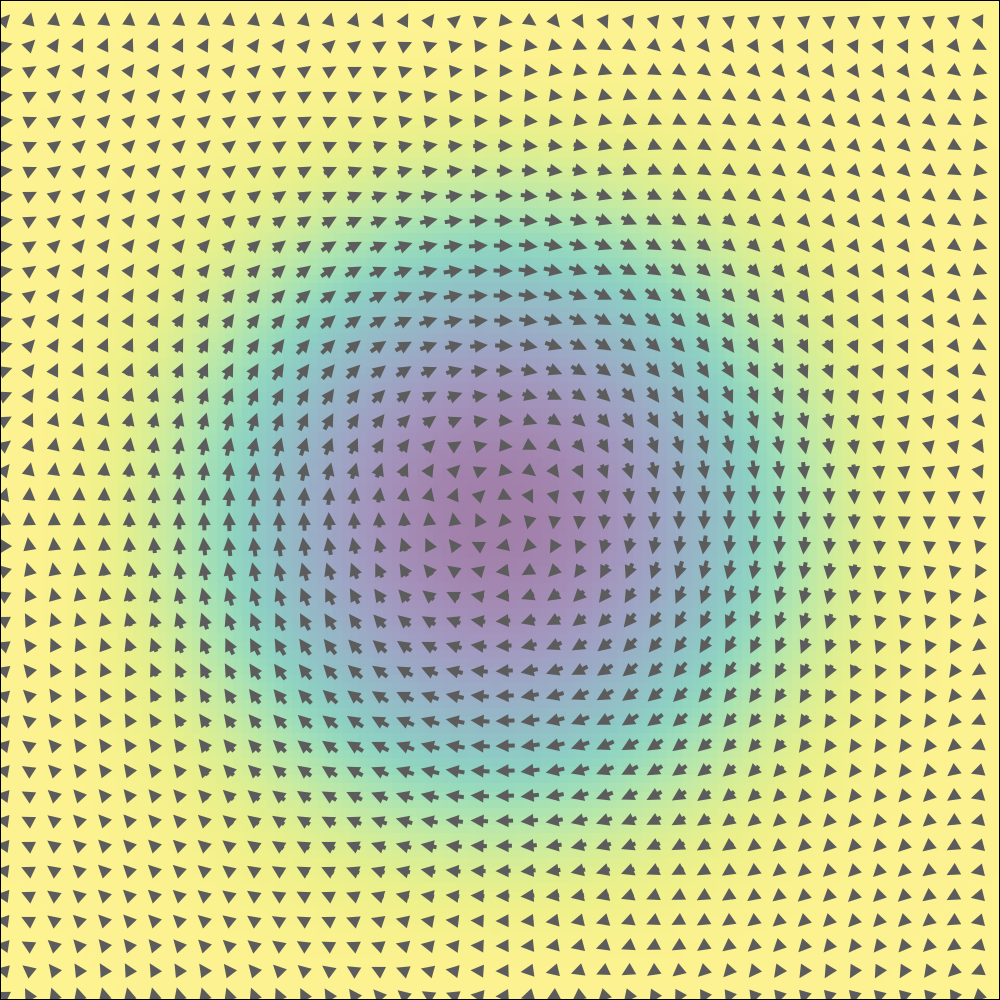

In [6]:
plot_m(sim)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*